In [3]:
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("deep"))

In [4]:
#Funcao auxiliar para calcular os valores dos campos nos pontos definidos pelo grid xvals,yvals.
def getPoints(xvals,yvals,zvals,func):

    VList = []
    xList = []
    yList = []
    zList = []
    for z in zvals:
        for y in yvals:
            for x in xvals:
                r = np.array([x,y,z])
                try:
                    V = func(r) 
                except:
                    continue #Pula pontos onde o campo diverge
                xList.append(x)
                yList.append(y)
                zList.append(z)
                VList.append(V)
    VList = np.array(VList)
    xList = np.array(xList)
    yList = np.array(yList)
    zList = np.array(zList)
    
    return xList,yList,zList,VList

### Aceleração gravitacional efetiva

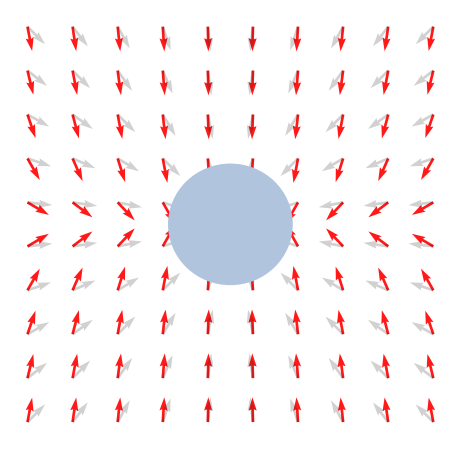

In [60]:
w = 0.9
R = 1.0
g = 1.0

def ge(r):
    
    gr = -(g-w**2*R)*r/np.linalg.norm(r)
    gz = -w**2*R*r[1]*np.array([0,1,0])/np.linalg.norm(r)    
    
    return gr+gz


def g0(r):
    
    gr = -g*r/np.linalg.norm(r)
    
    return gr


#Limites dos eixos e número de vetores
xmin, xmax, nx = -1,1,10
ymin, ymax, ny = -1,1,10
xvals = np.linspace(xmin, xmax, nx)
yvals = np.linspace(ymin, ymax, ny)
zvals = [0.0]

#Calcular valores dos campos:
x,y,_,V = getPoints(xvals,yvals,zvals,ge)
_,_,_,V0 = getPoints(xvals,yvals,zvals,g0)

#Calcular norma dos vetores:
Vnorm = np.array([np.linalg.norm(vv) for vv in V])
Vnorm0 = np.array([np.linalg.norm(vv) for vv in V0])

#Normalizar vetores (para manter as setas com mesmo tamanho):
V = np.array([vv/Vnorm[i] if Vnorm[i] else vv for i,vv in enumerate(V)])

#Normalizar vetores (para manter as setas com mesmo tamanho):
V0 = np.array([vv/Vnorm0[i] if Vnorm0[i] else vv for i,vv in enumerate(V0)])



#Plotar figura no plano x-y, usando cor para representar o tamanho dos vetores:
fig = plt.figure(figsize=(8,8))

colors = 2*Vnorm
colors0 = Vnorm
norm = Normalize(vmin=0,vmax=5)
plt.quiver(x,y,V[:,0],V[:,1],color='red',alpha=0.9,norm=norm)
plt.quiver(x,y,V0[:,0],V0[:,1],alpha=0.2,norm=norm)

circle1 = plt.Circle((0, 0), 0.3, color='lightsteelblue',linewidth=3, fill=True)
plt.gca().add_artist(circle1)

plt.gca().axis('off')
plt.savefig('ge.png')
plt.show()